In [1]:
import torch

In [2]:
import os
import sys
print(f"{sys.executable = }")
print(f"{os.getcwd() = }")
sys.path.append('/home/sh0416/sentence-benchmark/src')


sys.executable = '/home/sh0416/venv/bin/python'
os.getcwd() = '/home/sh0416/sentence-benchmark/src/notebooks'


In [3]:
from simcse.models import create_contrastive_learning
from simcse.config import ModelArguments

model_args = ModelArguments(loss_rwmd=True)
module = create_contrastive_learning(model_args)

ModuleNotFoundError: No module named 'simcse'

In [4]:


module.similarity_model.representation_model

AttributeError: 'InBatchContrastiveLearningModule' object has no attribute 'similarity_model'

In [5]:
root = "/home/sh0416/data/semeval16/task2/test_goldStandard"
sources = ["images", "headlines", "answers-students"]

filepaths_sent1 = [f"STSint.testinput.{source}.sent1.txt" for source in sources]
filepaths_sent2 = [f"STSint.testinput.{source}.sent2.txt" for source in sources]
filepaths_sent1_tok = [f"STSint.testinput.{source}.sent1.chunk.txt" for source in sources]
filepaths_sent2_tok = [f"STSint.testinput.{source}.sent2.chunk.txt" for source in sources]
filepaths_align = [f"STSint.testinput.{source}.wa" for source in sources]

In [6]:
import os
from simcse.eval.ists import load_alignment

data = load_alignment(os.path.join(root, filepaths_align[0]))

ModuleNotFoundError: No module named 'simcse'

In [7]:
data = []
for sentence in tree:
    sent1, sent2 = sentence.text.strip().splitlines()
    assert sent1.startswith('// ') and sent2.startswith('// ')
    text_pair = [sent1[3:], sent2[3:]]
    source = sentence.find("source").text.strip().splitlines()
    translation = sentence.find("translation").text.strip().splitlines()
    alignment = []
    for x in sentence.find("alignment").text.strip().splitlines():
        pair_id, type, score, comment = x.split(' // ')
        token_id_seq1, token_id_seq2 = pair_id.split(' == ')
        token_id_seq1 = [int(x) for x in token_id_seq1.split()]
        token_id_seq2 = [int(x) for x in token_id_seq2.split()]
        alignment.append({"pair_id": (token_id_seq1, token_id_seq2), "type": type, "score": score, "comment": comment})
    data.append({"text_pair": text_pair, "source": source, "translation": translation, "alignment": alignment})

NameError: name 'tree' is not defined

In [29]:
data[0]["text_pair"]

['A child in a blue and white team uniform chasing a soccer ball .',
 'A young boy in a blue soccer uniform chasing a ball .']

In [30]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_args.model_name_or_path)

In [37]:
inputs1 = tokenizer(data[0]["text_pair"][0])
inputs2 = tokenizer(data[0]["text_pair"][1])

print(inputs1)
module.similarity_model(inputs1, inputs2)

{'input_ids': tensor([[    0,   250,   920,    11,    10,  2440,     8,  1104,   165,  8284,
         11277,    10,  4191,  1011,   479,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


RuntimeError: torch.cat(): Sizes of tensors must match except in dimension 0. Got 16 and 14 in dimension 1 (The offending index is 1)

In [31]:
x = np.zeros((4, 2))
x[[0, 1], [0, 1]]

NameError: name 'np' is not defined

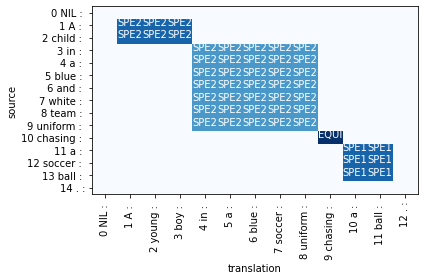

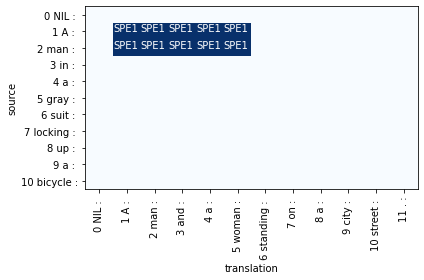

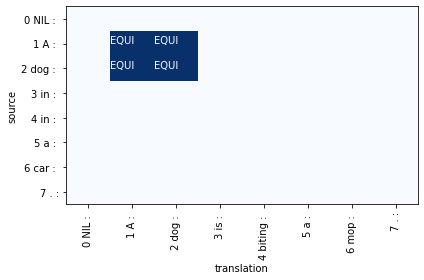

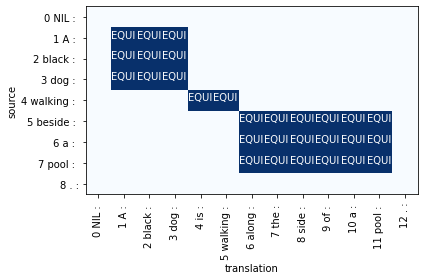

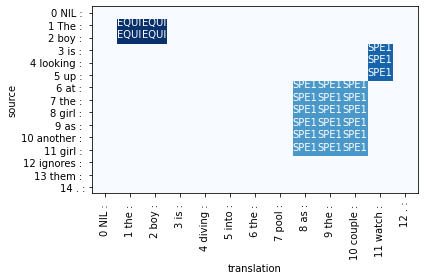

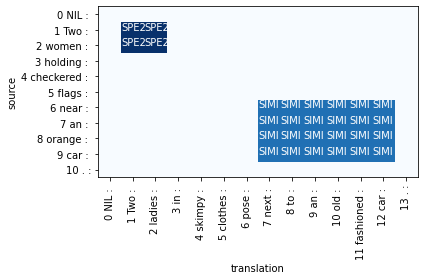

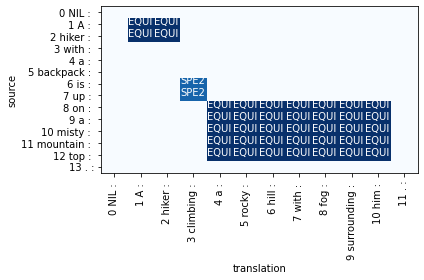

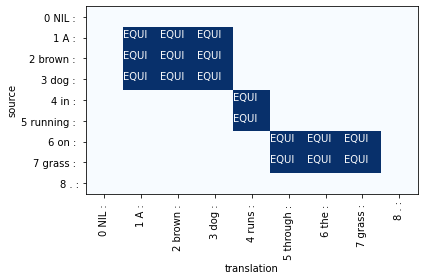

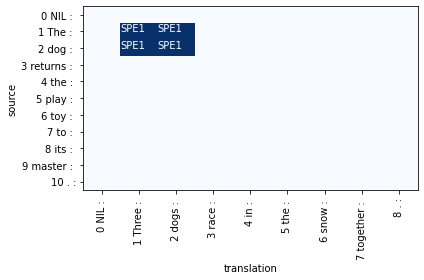

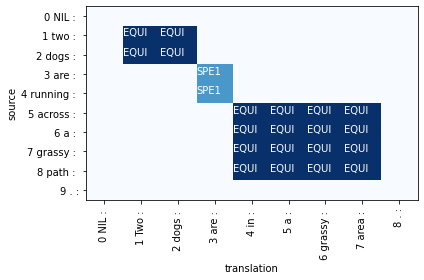

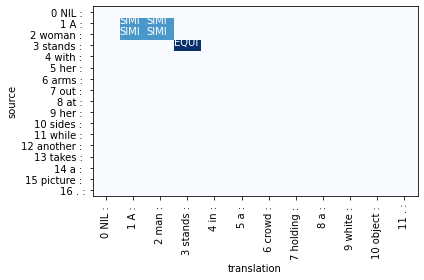

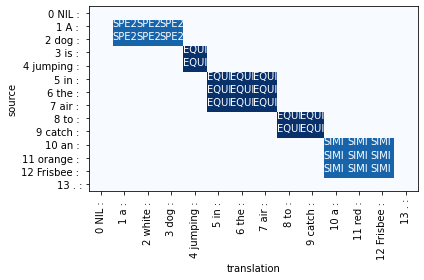

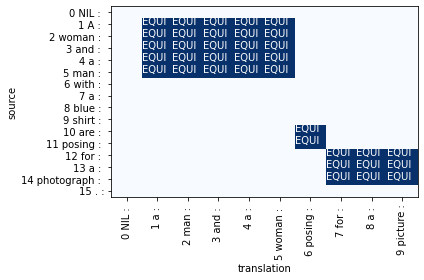

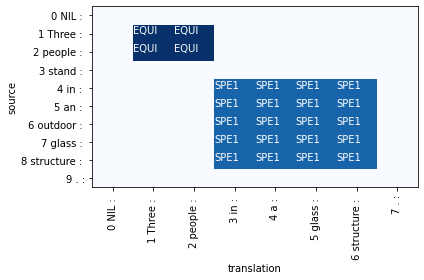

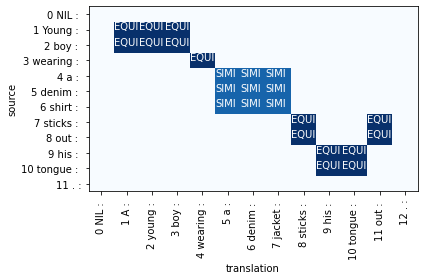

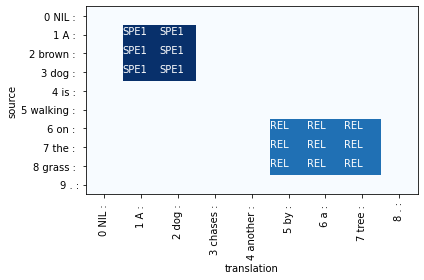

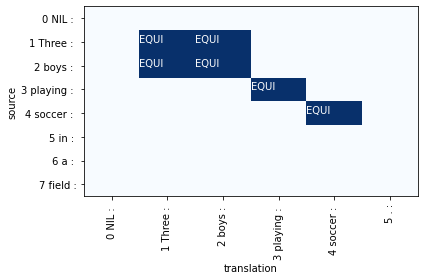

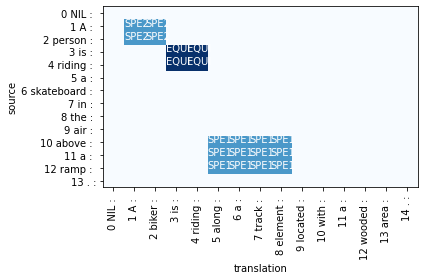

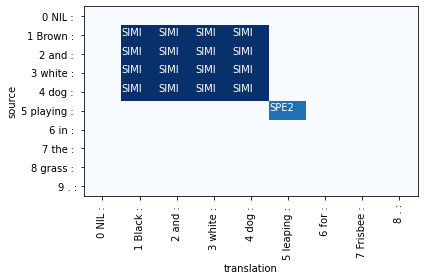

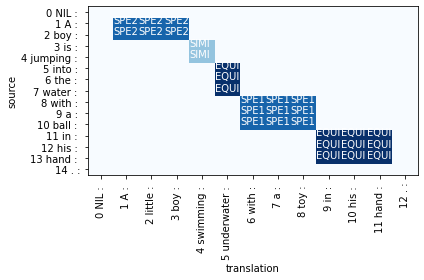

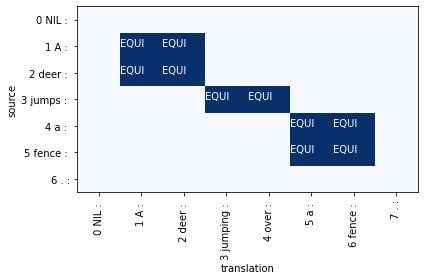

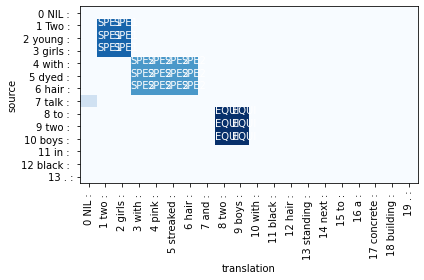

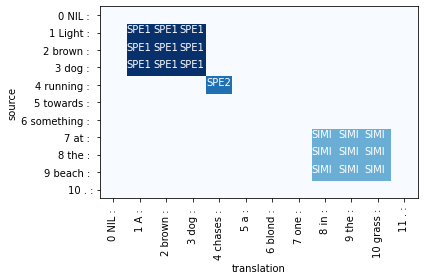

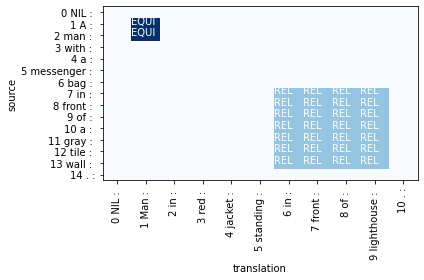

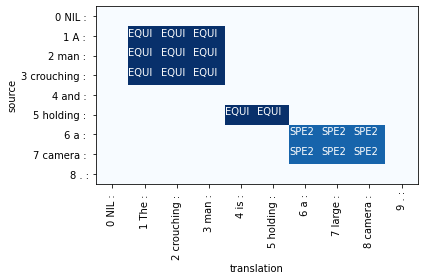

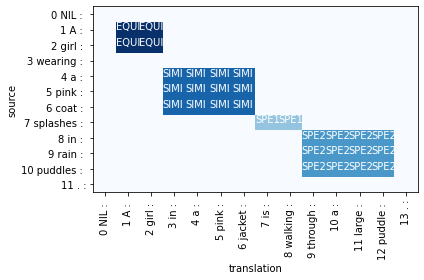

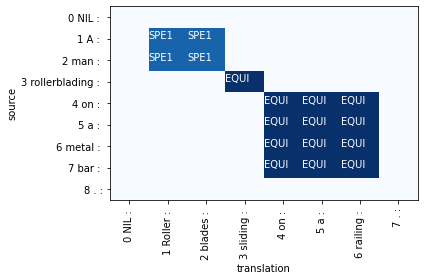

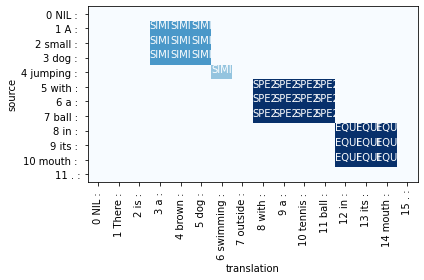

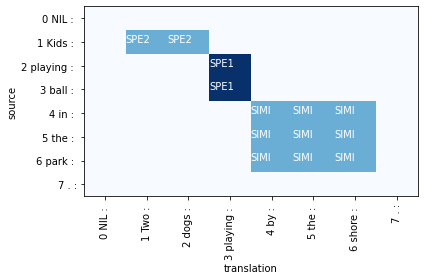

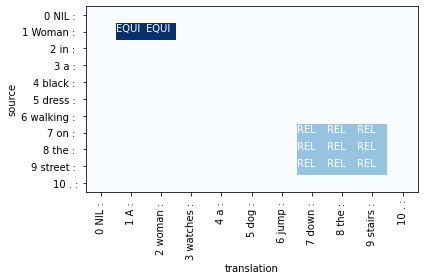

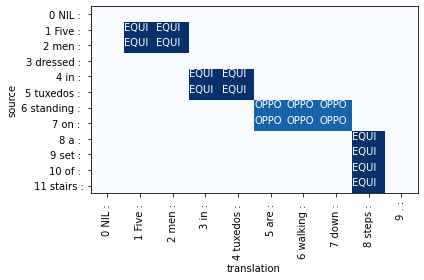

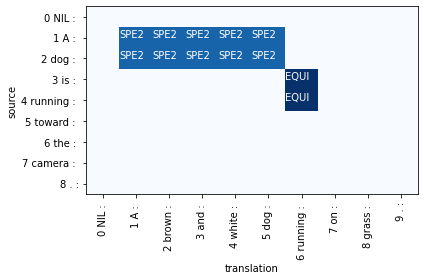

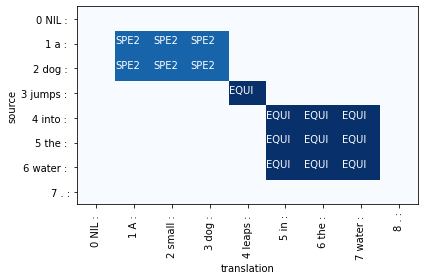

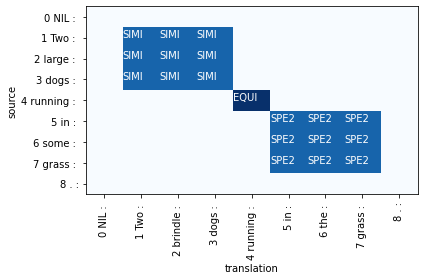

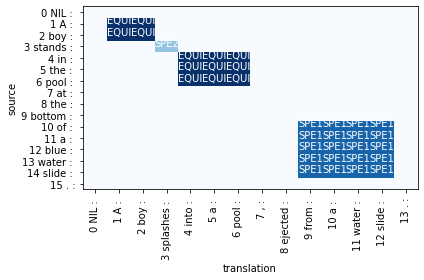

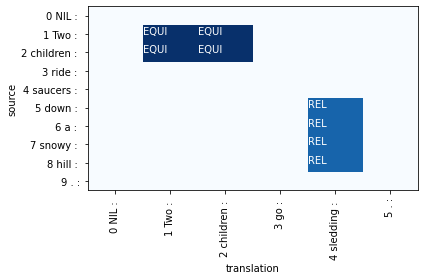

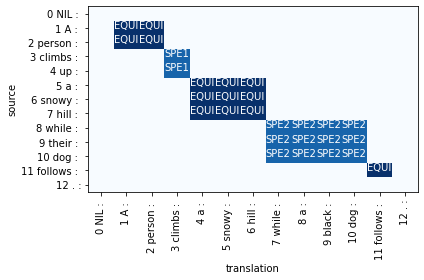

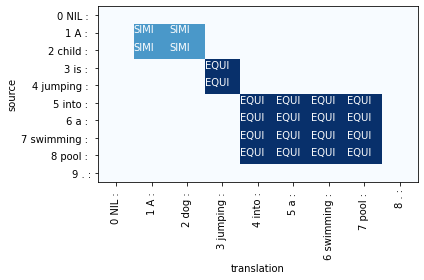

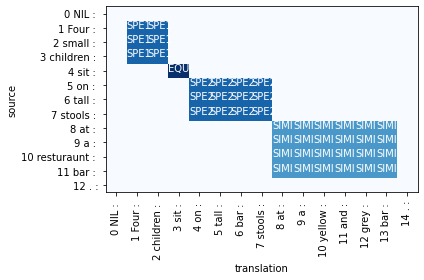

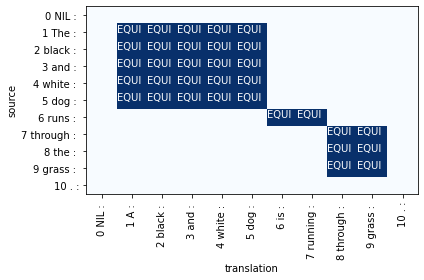

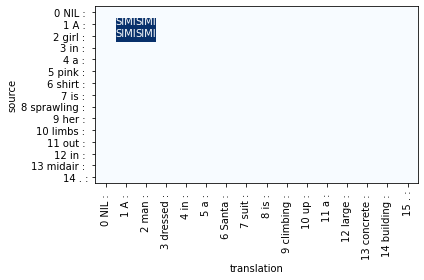

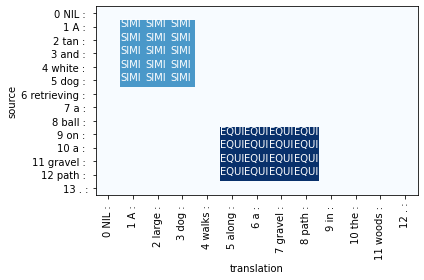

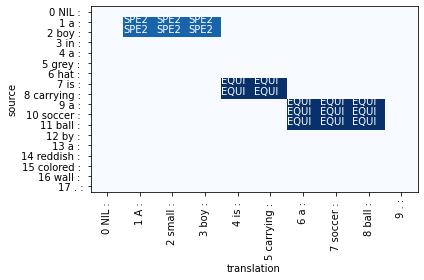

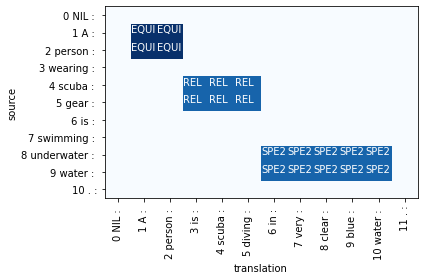

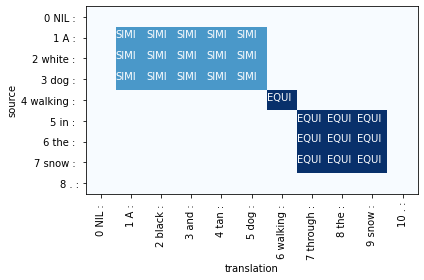

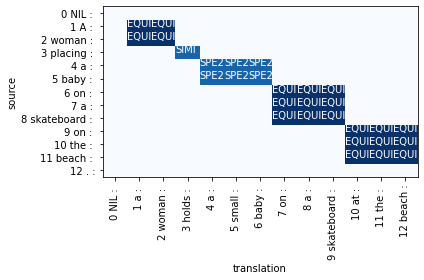

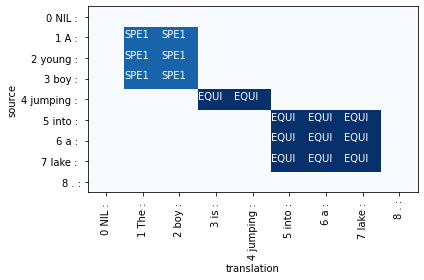

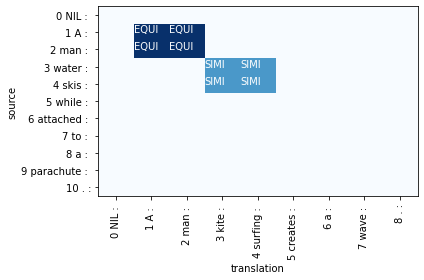

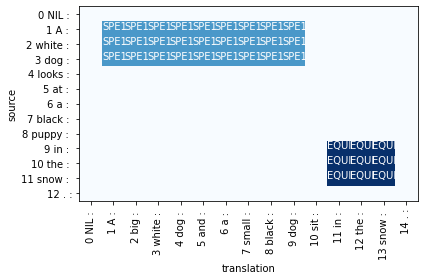

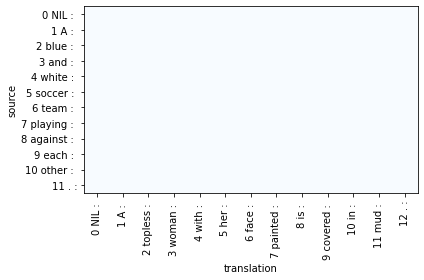

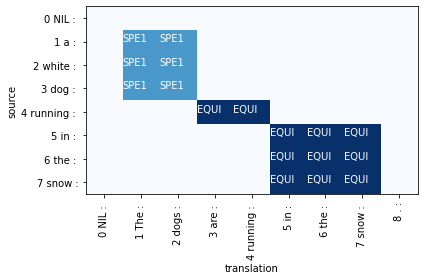

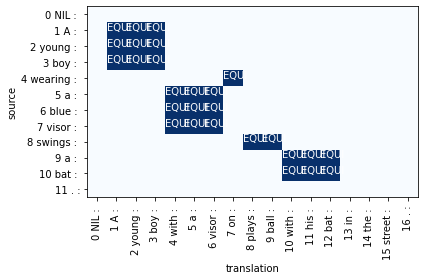

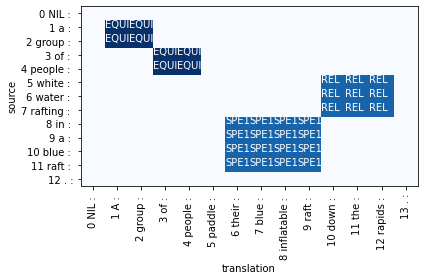

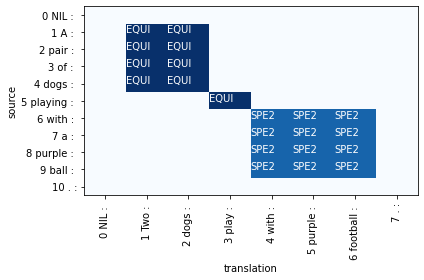

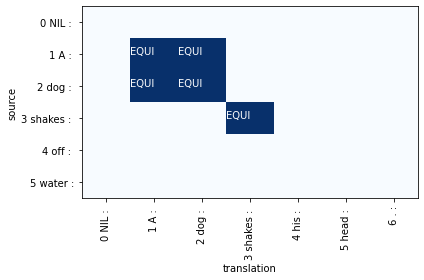

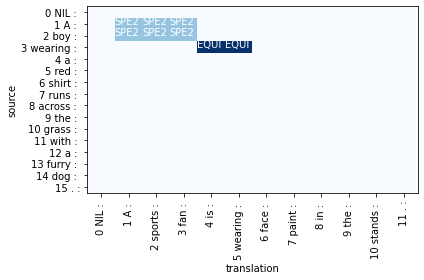

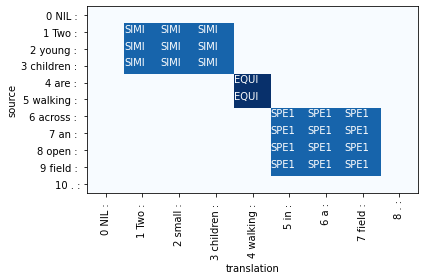

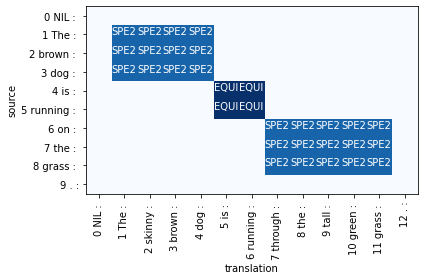

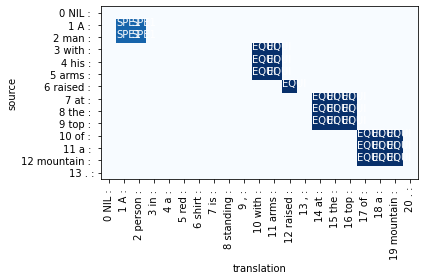

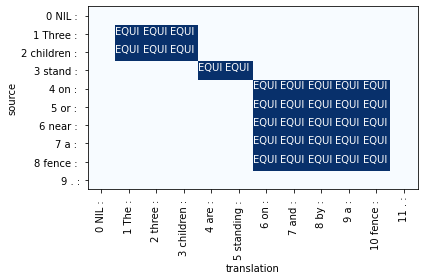

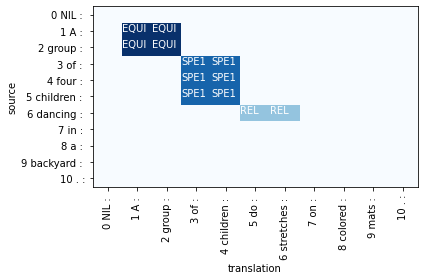

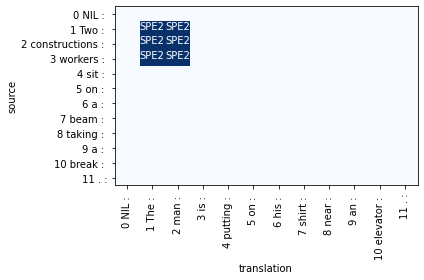

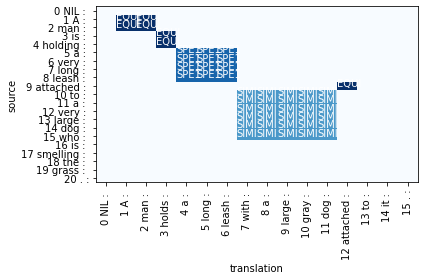

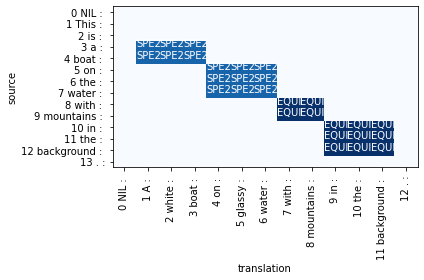

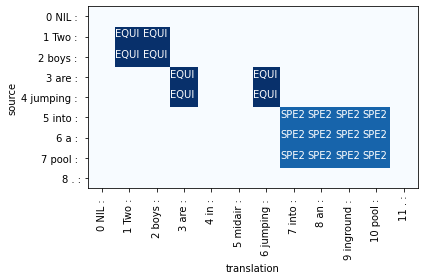

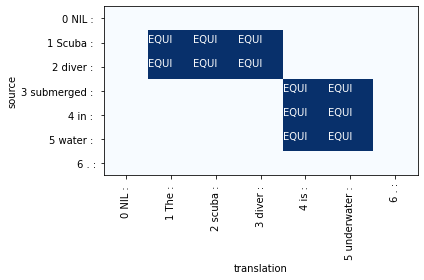

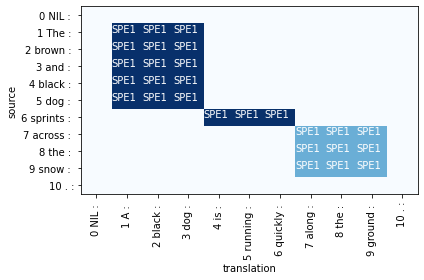

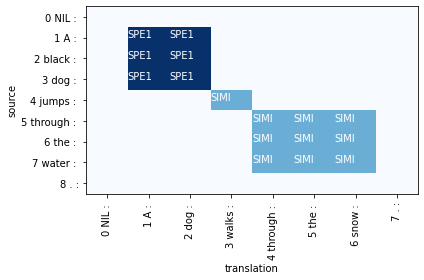

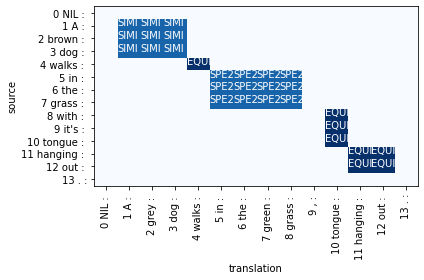

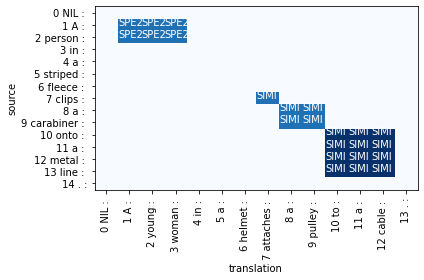

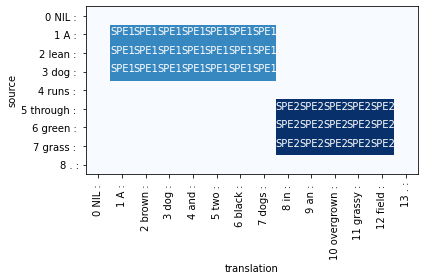

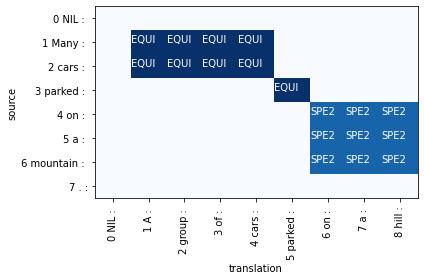

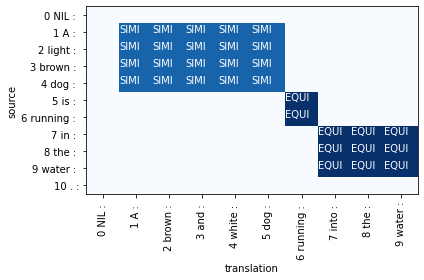

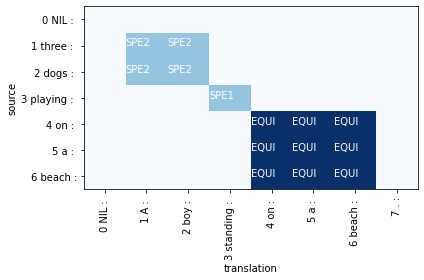

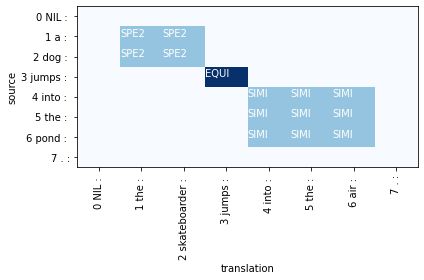

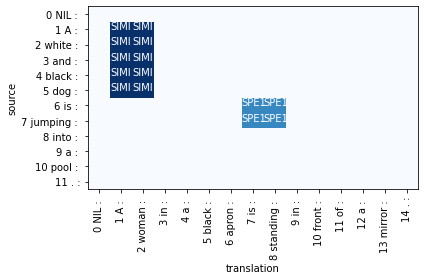

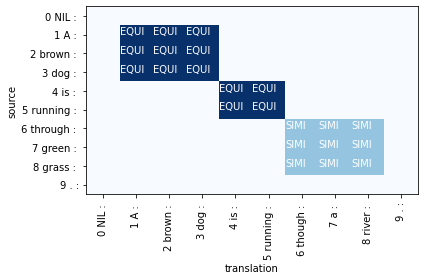

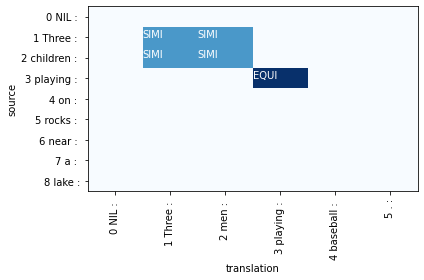

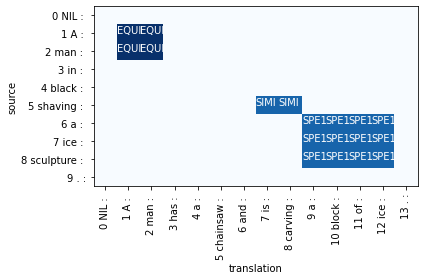

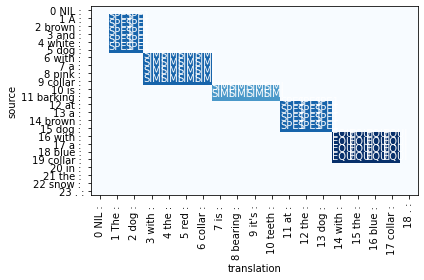

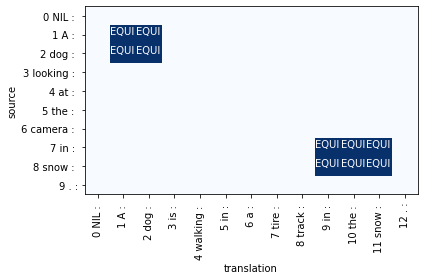

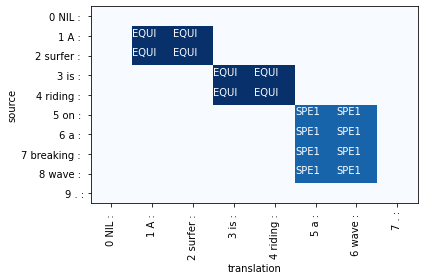

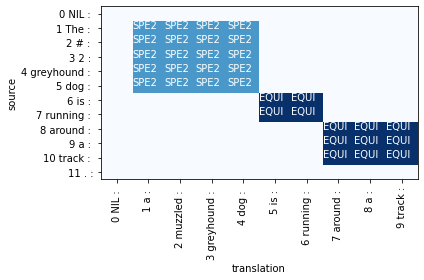

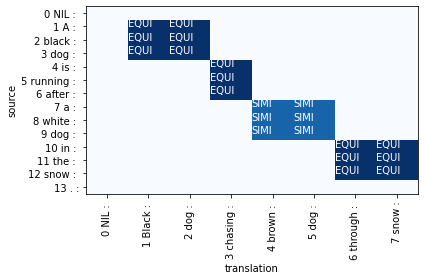

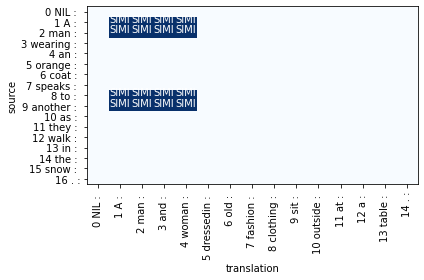

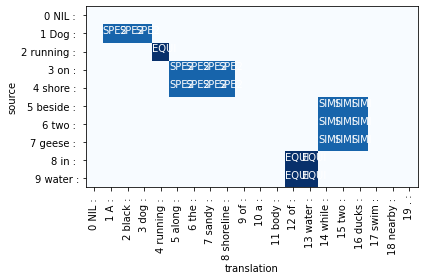

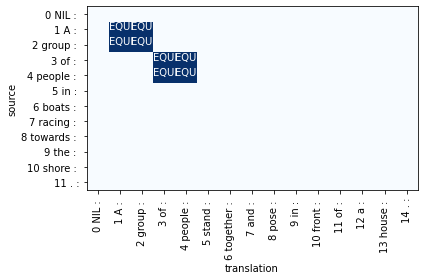

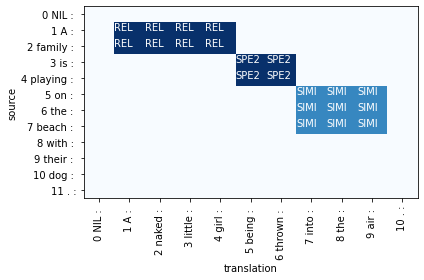

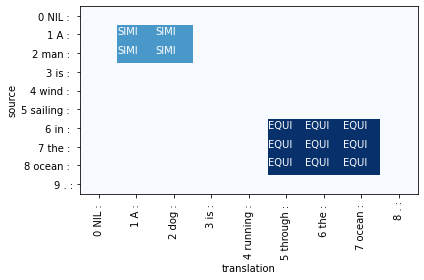

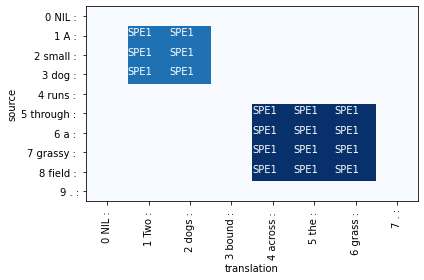

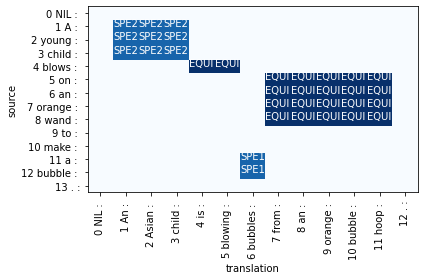

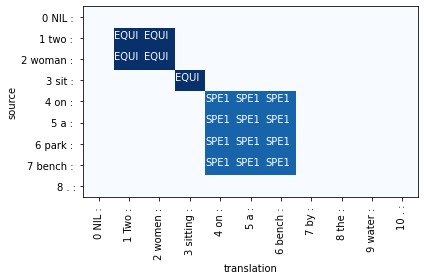

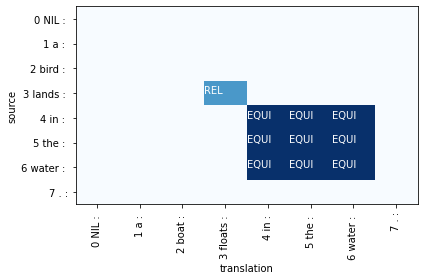

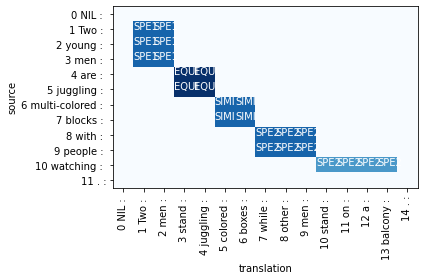

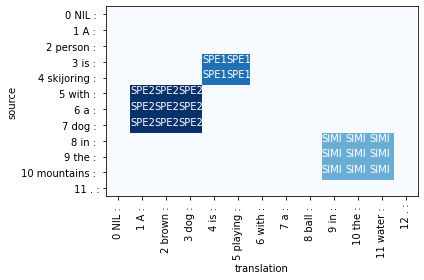

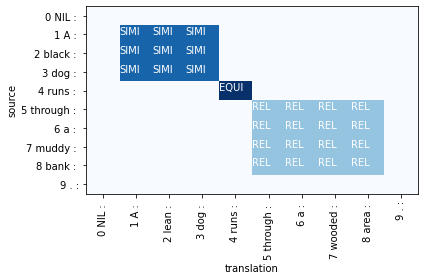

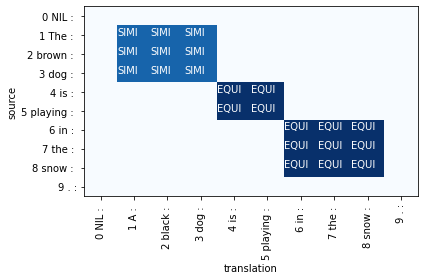

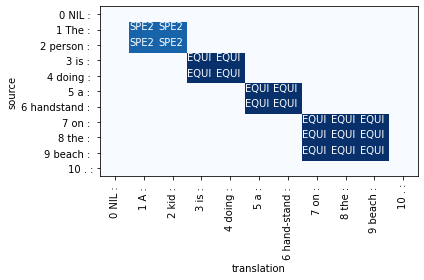

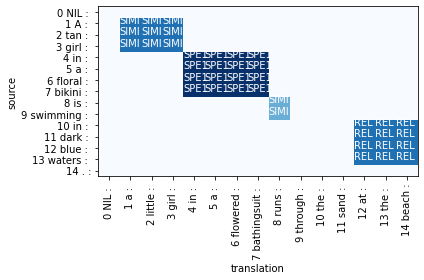

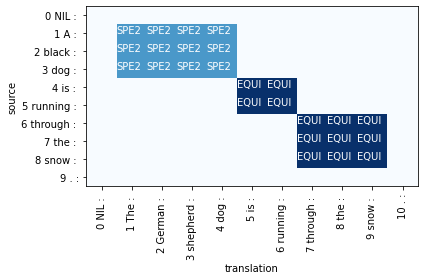

In [119]:
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap(sentence):
    source = ['0 NIL : '] + sentence["source"]
    translation = ['0 NIL : '] + sentence["translation"]
    heatmap = np.zeros((len(source), len(translation)))
    for a in sentence["alignment"]:
        if a["score"] != 'NIL':
            token_id_seq1, token_id_seq2 = a["pair_id"]
            score = float(a["score"])
            for token_id1 in token_id_seq1:
                for token_id2 in token_id_seq2:
                    heatmap[token_id1, token_id2] = score

    fig, ax = plt.subplots(facecolor='white')
    ax.set_ylabel("source")
    ax.set_yticks(np.arange(0.5, len(source)+0.5, 1))
    ax.set_yticklabels(source)
    ax.set_xlabel("translation")
    ax.set_xticks(np.arange(0.5, len(translation)+0.5, 1))
    ax.set_xticklabels(translation, rotation=90)
    ax.pcolormesh(heatmap, cmap=plt.get_cmap('Blues'))
    ax.invert_yaxis()
    for a in sentence["alignment"]:
        if a["type"] != 'NOALI':
            token_id_seq1, token_id_seq2 = a["pair_id"]
            for token_id1 in token_id_seq1:
                for token_id2 in token_id_seq2:
                    ax.text(token_id2, token_id1+0.5, a["type"], c='w')
    plt.tight_layout()
    return fig, ax

for sentence in data[:100]:
    plot_heatmap(sentence)
    plt.show()